In [1]:
#%%
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from mlxtend.evaluate import bias_variance_decomp

warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#%%
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  int32  
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
#%%
# Drop duplicated rows
duplicated_rows = df[df.duplicated()]
print("There are a total of {} number of duplicated rows.".format(duplicated_rows.shape[0]))

df.loc[df.duplicated(), :]

# Dropping the duplicated values
df.drop_duplicates(inplace = True)
print("Data shape after dropping the duplicated rows is {}".format(df.shape))

There are a total of 23899 number of duplicated rows.
Data shape after dropping the duplicated rows is (229781, 22)


The number of no heart disease or attack in the dataset are:  89.68 % of the dataset
The number of heart disease or attack in the dataset are:  10.32 % of the dataset


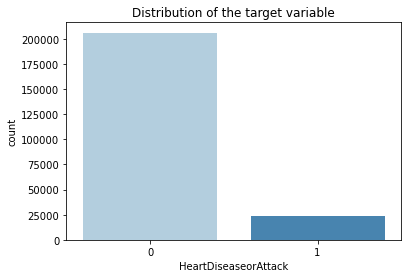

In [6]:
#%%
# Distribution of the target variable - HeartDiseaseorAttack
sns.countplot(x = df["HeartDiseaseorAttack"],
             palette = "Blues").set(title = "Distribution of the target variable")

# Distribution in terms of percentage of the target variable
print('The number of no heart disease or attack in the dataset are: ', round(df['HeartDiseaseorAttack'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The number of heart disease or attack in the dataset are: ', round(df['HeartDiseaseorAttack'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

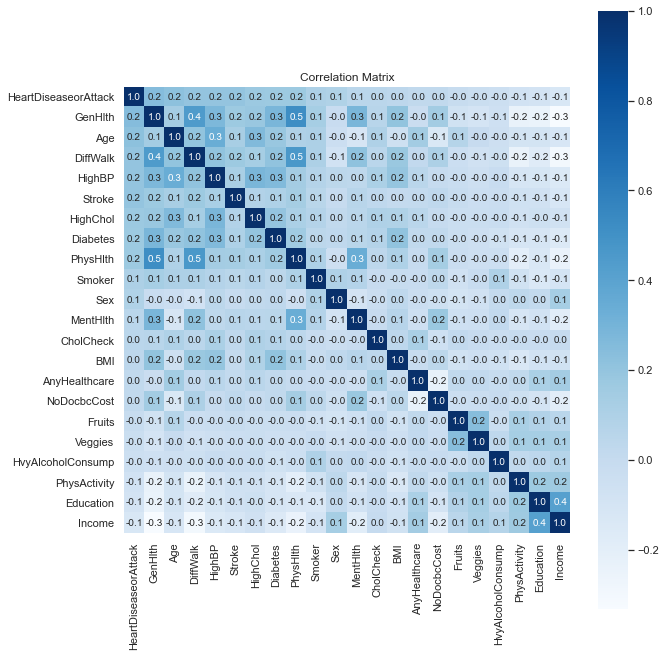

In [7]:
#%%
# Correlation plot for the dataset to see which variables are correlated to each other
correlation_matrix = df.corr()
k = 22 # number of variables for heatmap
cols = correlation_matrix.nlargest(k,'HeartDiseaseorAttack')['HeartDiseaseorAttack'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize = (10, 11))  # Sample figsize in inches
hm = sns.heatmap(cm, cbar=True, cmap = "Blues",
                 annot=True, square=True, 
                 fmt='.01f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values,ax=ax)
plt.title("Correlation Matrix")
plt.show()

In [8]:
#%%
# Checking for multicollinearity
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[["HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "Diabetes", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex", "Age", "Education", "Income"]]
y = df[["HeartDiseaseorAttack"]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["variables"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

            variables        VIF
0              HighBP   2.376639
1            HighChol   2.075802
2           CholCheck  21.485319
3                 BMI  17.514900
4              Smoker   1.983754
5              Stroke   1.108968
6            Diabetes   1.419802
7        PhysActivity   4.144036
8              Fruits   2.828395
9             Veggies   5.287618
10  HvyAlcoholConsump   1.092803
11      AnyHealthcare  18.957120
12        NoDocbcCost   1.219131
13            GenHlth  10.995989
14           MentHlth   1.469514
15           PhysHlth   2.009715
16           DiffWalk   1.847508
17                Sex   1.888215
18                Age   9.680500
19          Education  27.129044
20             Income  12.612472


In [9]:
#%%
# Dropping columns with multicollinearity
df = df.drop(["CholCheck", "BMI", "AnyHealthcare",
             "GenHlth", "Age", "Education", "Income",
             "Veggies"], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  229781 non-null  int32  
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   Smoker                229781 non-null  float64
 4   Stroke                229781 non-null  float64
 5   Diabetes              229781 non-null  float64
 6   PhysActivity          229781 non-null  float64
 7   Fruits                229781 non-null  float64
 8   HvyAlcoholConsump     229781 non-null  float64
 9   NoDocbcCost           229781 non-null  float64
 10  MentHlth              229781 non-null  float64
 11  PhysHlth              229781 non-null  float64
 12  DiffWalk              229781 non-null  float64
 13  Sex                   229781 non-null  float64
dtypes: float64(13), int32(1)
memory usage: 33.5 MB


# Balancing Technique

In [10]:
#%%
# import SMOTE and other over-sampling techniques
from collections import Counter
# pip install imblearn
from imblearn.over_sampling import SMOTE

In [11]:
#%%
# Separating the target feature from other features
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [12]:
#%%
# Split train-test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ", Counter(y_train_SMOTE))

Before oversampling:  Counter({0: 108186, 1: 12448})
After oversampling:  Counter({0: 108186, 1: 108186})


In [13]:
#%%
resampled_df = pd.concat([X_train_SMOTE, y_train_SMOTE], axis = 1)
print("Information of the dataset after balancing: ",resampled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216372 entries, 0 to 216371
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                216372 non-null  float64
 1   HighChol              216372 non-null  float64
 2   Smoker                216372 non-null  float64
 3   Stroke                216372 non-null  float64
 4   Diabetes              216372 non-null  float64
 5   PhysActivity          216372 non-null  float64
 6   Fruits                216372 non-null  float64
 7   HvyAlcoholConsump     216372 non-null  float64
 8   NoDocbcCost           216372 non-null  float64
 9   MentHlth              216372 non-null  float64
 10  PhysHlth              216372 non-null  float64
 11  DiffWalk              216372 non-null  float64
 12  Sex                   216372 non-null  float64
 13  HeartDiseaseorAttack  216372 non-null  int32  
dtypes: float64(13), int32(1)
memory usage: 22.3 MB
Infor

[Text(0.5, 1.0, 'Count plot of the target variable HeartDiseaseorAttack after balancing.')]

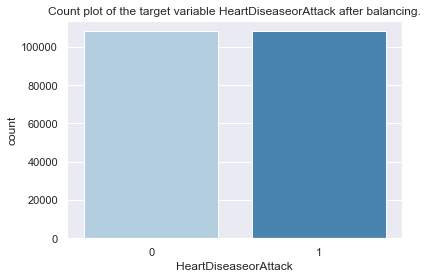

In [14]:
#%%
# Target variable distribution after balancing the data
sns.countplot(x = resampled_df["HeartDiseaseorAttack"],
             palette = "Blues").set(title = "Count plot of the target variable HeartDiseaseorAttack after balancing.")

# Naive Bayes

In [15]:
#%%
# SMOTE - Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
Gnb = GaussianNB()
Gnb.fit(X_train_SMOTE, y_train_SMOTE)

gnb_ypred_train = Gnb.predict(X_train_SMOTE)
gnb_ypred_valid = Gnb.predict(X_valid)

print("Training Results:\n")
print(classification_report(y_train_SMOTE, gnb_ypred_train))

print("\n\n Validation Results:\n")
print(classification_report(y_valid, gnb_ypred_valid))

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_valid, gnb_ypred_valid))

Training Results:

              precision    recall  f1-score   support

           0       0.67      0.77      0.71    108186
           1       0.73      0.61      0.67    108186

    accuracy                           0.69    216372
   macro avg       0.70      0.69      0.69    216372
weighted avg       0.70      0.69      0.69    216372



 Validation Results:

              precision    recall  f1-score   support

           0       0.95      0.77      0.85     36031
           1       0.24      0.62      0.35      4181

    accuracy                           0.76     40212
   macro avg       0.59      0.70      0.60     40212
weighted avg       0.87      0.76      0.80     40212

Naive Bayes Classifier Accuracy:  0.7552720580921118


The AUC value is:  0.695884034085799


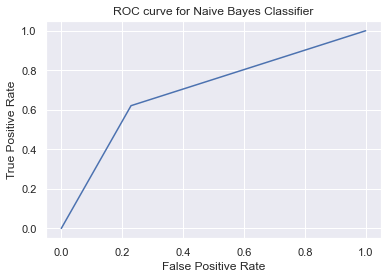

In [16]:
#%%
# ROC AUC curve
gnb_tpr, gnb_fpr, gnb_th = roc_curve(y_valid, Gnb.predict(X_valid))
plt.plot(gnb_tpr,gnb_fpr)
print("The AUC value is: ", roc_auc_score(y_valid, Gnb.predict(X_valid)))
plt.title("ROC curve for Naive Bayes Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [17]:
#%%
# Confusion Matrix
from sklearn.metrics import confusion_matrix 
print("Confusion Matrix for Naive Bayes Classifier", confusion_matrix(y_valid, gnb_ypred_valid))

Confusion Matrix for Naive Bayes Classifier [[27775  8256]
 [ 1585  2596]]


# Logistic Regression

In [18]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_SMOTE, y_train_SMOTE)

lr_ypred_train = lr.predict(X_train_SMOTE)
lr_ypred_valid = lr.predict(X_valid)

print("Training Results:\n")
print(classification_report(y_train_SMOTE, lr_ypred_train))

print("\n\n Validation Results:\n")
print(classification_report(y_valid, lr_ypred_valid))

print("Logistic Regression Accuracy is:", accuracy_score(y_valid, lr_ypred_valid))

Training Results:

              precision    recall  f1-score   support

           0       0.72      0.72      0.72    108186
           1       0.72      0.73      0.72    108186

    accuracy                           0.72    216372
   macro avg       0.72      0.72      0.72    216372
weighted avg       0.72      0.72      0.72    216372



 Validation Results:

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     36031
           1       0.23      0.72      0.35      4181

    accuracy                           0.72     40212
   macro avg       0.59      0.72      0.59     40212
weighted avg       0.88      0.72      0.77     40212

Logistic Regression Accuracy is: 0.7211280214861235


The AUC value is:  0.7214413236373678


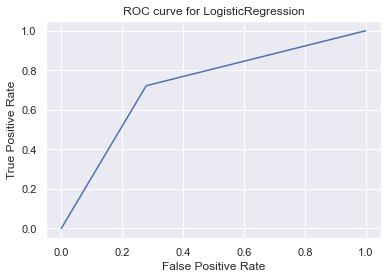

In [19]:
#%%
# ROC AUC curve 
lr_tpr, lr_fpr, lr_th = roc_curve(y_valid, lr.predict(X_valid))
plt.plot(lr_tpr,lr_fpr)
print("The AUC value is: ", roc_auc_score(y_valid, lr.predict(X_valid)))
plt.title("ROC curve for LogisticRegression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [20]:
#%%
# Confusion Matrix
print("Confusion Matrix for Decision Tree Classifier", confusion_matrix(y_valid, lr_ypred_valid))

Confusion Matrix for Decision Tree Classifier [[25980 10051]
 [ 1163  3018]]


# Decision Tree

In [21]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=1)
dtc.fit(X_train_SMOTE,y_train_SMOTE)

dtc_ypred_train = dtc.predict(X_train_SMOTE)
dtc_ypred_valid = dtc.predict(X_valid)

# Evaluate test-set accuracy
print("Training Results:\n")
print(classification_report(y_train_SMOTE, dtc_ypred_train))

print("\n\n Validation Results:\n")
print(classification_report(y_valid, dtc_ypred_valid))

print("Decision Tree Accuracy:", accuracy_score(y_valid, dtc_ypred_valid))

Training Results:

              precision    recall  f1-score   support

           0       0.70      0.76      0.73    108186
           1       0.74      0.67      0.70    108186

    accuracy                           0.72    216372
   macro avg       0.72      0.72      0.72    216372
weighted avg       0.72      0.72      0.72    216372



 Validation Results:

              precision    recall  f1-score   support

           0       0.94      0.76      0.84     36031
           1       0.22      0.58      0.32      4181

    accuracy                           0.74     40212
   macro avg       0.58      0.67      0.58     40212
weighted avg       0.86      0.74      0.79     40212

Decision Tree Accuracy: 0.7425892768327862


The AUC value is:  0.66977869338656


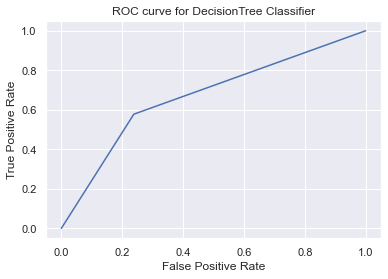

In [22]:
# %%
# ROC AUC curve
dtc_tpr, dtc_fpr, dtc_th = roc_curve(y_valid, dtc_ypred_valid)
plt.plot(dtc_tpr,dtc_fpr)
print("The AUC value is: ", roc_auc_score(y_valid, dtc_ypred_valid))
plt.title("ROC curve for DecisionTree Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [23]:
#%%
# Confusion Matrix
print("Confusion Matrix for Decision Tree Classifier", confusion_matrix(y_valid, dtc_ypred_valid))

Confusion Matrix for Decision Tree Classifier [[27445  8586]
 [ 1765  2416]]


# Random Forest

In [24]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rs = RandomForestClassifier(random_state = 11, n_jobs = -1, max_depth=3)
rs.fit(X_train_SMOTE, y_train_SMOTE)

rs_ypred_train = rs.predict(X_train_SMOTE)
rs_ypred_valid = rs.predict(X_valid)

print("Training Results:\n")
print(classification_report(y_train_SMOTE, rs_ypred_train))

print("\n\n Validation Results:\n")
print(classification_report(y_valid, rs_ypred_valid))

print("RandomForest Accuracy:", accuracy_score(y_valid, rs_ypred_valid))

Training Results:

              precision    recall  f1-score   support

           0       0.76      0.69      0.72    108186
           1       0.72      0.78      0.75    108186

    accuracy                           0.73    216372
   macro avg       0.74      0.73      0.73    216372
weighted avg       0.74      0.73      0.73    216372



 Validation Results:

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     36031
           1       0.22      0.73      0.33      4181

    accuracy                           0.70     40212
   macro avg       0.59      0.71      0.57     40212
weighted avg       0.88      0.70      0.76     40212

RandomForest Accuracy: 0.6975281010643589


The AUC value is:  0.7122891519222554


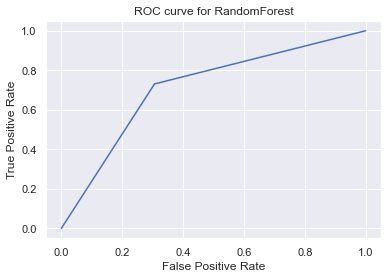

In [25]:
#%%
# ROC AUC curve
rs_tpr, rs_fpr, rs_th = roc_curve(y_valid, rs_ypred_valid)
plt.plot(rs_tpr,rs_fpr)
print("The AUC value is: ", roc_auc_score(y_valid, rs_ypred_valid))
plt.title("ROC curve for RandomForest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [26]:
#%%
# Confusion Matrix
print("Confusion Matrix for Random Forest", confusion_matrix(y_valid, rs_ypred_valid))

Confusion Matrix for Random Forest [[24993 11038]
 [ 1125  3056]]


# XGBoost

In [28]:
#XGBoost Classifier
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_SMOTE, y_train_SMOTE)

xgbc_ypred_train = xgbc.predict(X_train_SMOTE)
xgbc_ypred_valid = xgbc.predict(X_valid)

# Evaluate test-set accuracy
print("Training Results:\n")
print(classification_report(y_train_SMOTE, xgbc_ypred_train))

print("\n\n Validation Results:\n")
print(classification_report(y_valid, xgbc_ypred_valid))

print("XGBoost Accuracy:", accuracy_score(y_valid, xgbc_ypred_valid))

Training Results:

              precision    recall  f1-score   support

           0       0.82      0.85      0.83    108186
           1       0.84      0.81      0.82    108186

    accuracy                           0.83    216372
   macro avg       0.83      0.83      0.83    216372
weighted avg       0.83      0.83      0.83    216372



 Validation Results:

              precision    recall  f1-score   support

           0       0.93      0.84      0.88     36031
           1       0.24      0.43      0.31      4181

    accuracy                           0.80     40212
   macro avg       0.59      0.64      0.60     40212
weighted avg       0.86      0.80      0.82     40212

XGBoost Accuracy: 0.8005321794489207


The AUC value is:  0.6388963797956251


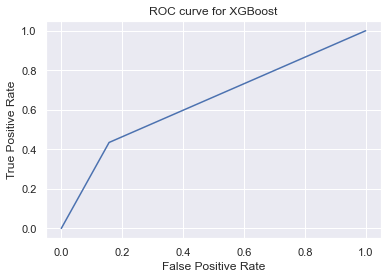

In [29]:
#%%
xgbc_tpr, xgbc_fpr, xgbc_th = roc_curve(y_valid, xgbc_ypred_valid)
plt.plot(xgbc_tpr, xgbc_fpr)
print("The AUC value is: ", roc_auc_score(y_valid, xgbc_ypred_valid))
plt.title("ROC curve for XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [30]:
#%%
# Confusion Matrix
print("Confusion Matrix for XGBoost", confusion_matrix(y_valid, xgbc_ypred_valid))

Confusion Matrix for XGBoost [[30373  5658]
 [ 2363  1818]]


# Testing data

Training Results:

              precision    recall  f1-score   support

           0       0.67      0.77      0.71    108186
           1       0.73      0.61      0.67    108186

    accuracy                           0.69    216372
   macro avg       0.70      0.69      0.69    216372
weighted avg       0.70      0.69      0.69    216372



 Testing Results:

              precision    recall  f1-score   support

           0       0.95      0.78      0.85     61847
           1       0.24      0.61      0.34      7088

    accuracy                           0.76     68935
   macro avg       0.59      0.69      0.60     68935
weighted avg       0.87      0.76      0.80     68935

Naive Bayes Classifier Accuracy for testing data:  0.7605860593312541
The AUC value is:  0.6949413202776925


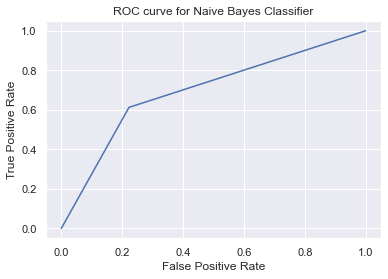

Confusion Matrix for Naive Bayes Classifier [[48091 13756]
 [ 2748  4340]]


In [34]:
#%%
# Naive Bayes

gnb_ypred_test = Gnb.predict(X_test)

print("Training Results:\n")
print(classification_report(y_train_SMOTE, gnb_ypred_train))

print("\n\n Testing Results:\n")
print(classification_report(y_test, gnb_ypred_test))

print("Naive Bayes Classifier Accuracy for testing data: ",accuracy_score(y_test, gnb_ypred_test))

#%%
# ROC AUC curve
gnb_tpr_test, gnb_fpr_test, gnb_th_test = roc_curve(y_test, Gnb.predict(X_test))
plt.plot(gnb_tpr_test,gnb_fpr_test)
print("The AUC value is: ", roc_auc_score(y_test, Gnb.predict(X_test)))
plt.title("ROC curve for Naive Bayes Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#%%
# Confusion Matrix
from sklearn.metrics import confusion_matrix 
print("Confusion Matrix for Naive Bayes Classifier", confusion_matrix(y_test, gnb_ypred_test))

Training Results:

              precision    recall  f1-score   support

           0       0.72      0.72      0.72    108186
           1       0.72      0.73      0.72    108186

    accuracy                           0.72    216372
   macro avg       0.72      0.72      0.72    216372
weighted avg       0.72      0.72      0.72    216372



 Testing Results:

              precision    recall  f1-score   support

           0       0.96      0.73      0.83     61847
           1       0.23      0.71      0.35      7088

    accuracy                           0.73     68935
   macro avg       0.59      0.72      0.59     68935
weighted avg       0.88      0.73      0.78     68935

Logistic Regression Accuracy for Testing data: 0.7251758903314717
The AUC value is:  0.7199265601952769


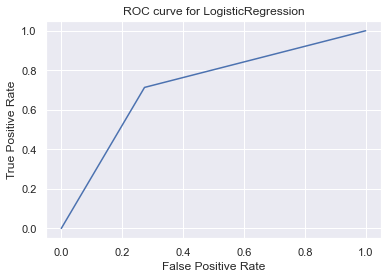

Confusion Matrix for Decision Tree Classifier [[44934 16913]
 [ 2032  5056]]


In [35]:
# LogisticRegression

lr_ypred_test = lr.predict(X_test)

print("Training Results:\n")
print(classification_report(y_train_SMOTE, lr_ypred_train))

print("\n\n Testing Results:\n")
print(classification_report(y_test, lr_ypred_test))

print("Logistic Regression Accuracy for Testing data:", accuracy_score(y_test, lr_ypred_test))

#%%
# ROC AUC curve 
lr_tpr_test, lr_fpr_test, lr_th_test = roc_curve(y_test, lr.predict(X_test))
plt.plot(lr_tpr_test,lr_fpr_test)
print("The AUC value is: ", roc_auc_score(y_test, lr.predict(X_test)))
plt.title("ROC curve for LogisticRegression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#%%
# Confusion Matrix
print("Confusion Matrix for Decision Tree Classifier", confusion_matrix(y_test, lr_ypred_test))

Training Results:

              precision    recall  f1-score   support

           0       0.70      0.76      0.73    108186
           1       0.74      0.67      0.70    108186

    accuracy                           0.72    216372
   macro avg       0.72      0.72      0.72    216372
weighted avg       0.72      0.72      0.72    216372



 Testing Results:

              precision    recall  f1-score   support

           0       0.94      0.77      0.84     61847
           1       0.22      0.56      0.31      7088

    accuracy                           0.75     68935
   macro avg       0.58      0.67      0.58     68935
weighted avg       0.86      0.75      0.79     68935

Decision Tree Accuracy on Testing data: 0.7460651338217161
The AUC value is:  0.6656757465658081


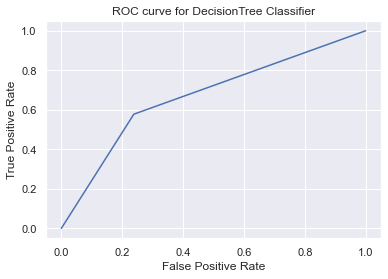

Confusion Matrix for Decision Tree Classifier [[47429 14418]
 [ 3087  4001]]


In [36]:
# Decision Tree Classifier

dtc_ypred_test = dtc.predict(X_test)

# Evaluate test-set accuracy
print("Training Results:\n")
print(classification_report(y_train_SMOTE, dtc_ypred_train))

print("\n\n Testing Results:\n")
print(classification_report(y_test, dtc_ypred_test))

print("Decision Tree Accuracy on Testing data:", accuracy_score(y_test, dtc_ypred_test))

# %%
# ROC AUC curve
dtc_tpr_test, dtc_fpr_test, dtc_th_test = roc_curve(y_test, dtc_ypred_test)
plt.plot(dtc_tpr,dtc_fpr)
print("The AUC value is: ", roc_auc_score(y_test, dtc_ypred_test))
plt.title("ROC curve for DecisionTree Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#%%
# Confusion Matrix
print("Confusion Matrix for Decision Tree Classifier", confusion_matrix(y_test, dtc_ypred_test))

Training Results:

              precision    recall  f1-score   support

           0       0.76      0.69      0.72    108186
           1       0.72      0.78      0.75    108186

    accuracy                           0.73    216372
   macro avg       0.74      0.73      0.73    216372
weighted avg       0.74      0.73      0.73    216372



 Testing Results:

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     61847
           1       0.22      0.72      0.33      7088

    accuracy                           0.70     68935
   macro avg       0.59      0.71      0.57     68935
weighted avg       0.88      0.70      0.76     68935

RandomForest Accuracy on Testing data: 0.7029955755421774
The AUC value is:  0.7119374215026589


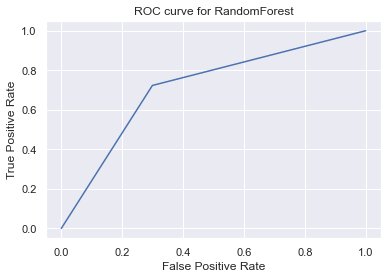

Confusion Matrix for Random Forest [[43335 18512]
 [ 1962  5126]]


In [37]:
# RandomForest

rs_ypred_test = rs.predict(X_test)

print("Training Results:\n")
print(classification_report(y_train_SMOTE, rs_ypred_train))

print("\n\n Testing Results:\n")
print(classification_report(y_test, rs_ypred_test))

print("RandomForest Accuracy on Testing data:", accuracy_score(y_test, rs_ypred_test))

#%%
# ROC AUC curve
rs_tpr_test, rs_fpr_test, rs_th_test = roc_curve(y_test, rs_ypred_test)
plt.plot(rs_tpr_test, rs_fpr_test)
print("The AUC value is: ", roc_auc_score(y_test, rs_ypred_test))
plt.title("ROC curve for RandomForest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#%%
# Confusion Matrix
print("Confusion Matrix for Random Forest", confusion_matrix(y_test, rs_ypred_test))

Training Results:

              precision    recall  f1-score   support

           0       0.82      0.85      0.83    108186
           1       0.84      0.81      0.82    108186

    accuracy                           0.83    216372
   macro avg       0.83      0.83      0.83    216372
weighted avg       0.83      0.83      0.83    216372



 Testing Results:

              precision    recall  f1-score   support

           0       0.93      0.85      0.88     61847
           1       0.24      0.43      0.31      7088

    accuracy                           0.80     68935
   macro avg       0.58      0.64      0.60     68935
weighted avg       0.86      0.80      0.83     68935

XGBoost Accuracy on Testing data: 0.8023645463117429
The AUC value is:  0.6369676440397353


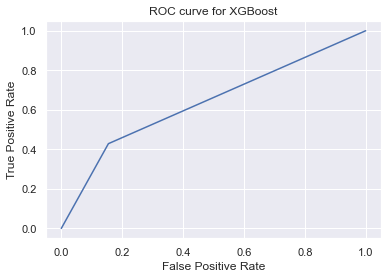

Confusion Matrix for XGBoost [[52272  9575]
 [ 4049  3039]]


In [38]:
#XGBoost Classifier

xgbc_ypred_test = xgbc.predict(X_test)

print("Training Results:\n")
print(classification_report(y_train_SMOTE, xgbc_ypred_train))

print("\n\n Testing Results:\n")
print(classification_report(y_test, xgbc_ypred_test))

print("XGBoost Accuracy on Testing data:", accuracy_score(y_test, xgbc_ypred_test))

#%%
xgbc_tpr_test, xgbc_fpr_test, xgbc_th_test = roc_curve(y_test, xgbc_ypred_test)
plt.plot(xgbc_tpr_test, xgbc_fpr_test)
print("The AUC value is: ", roc_auc_score(y_test, xgbc_ypred_test))
plt.title("ROC curve for XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#%%
# Confusion Matrix
print("Confusion Matrix for XGBoost", confusion_matrix(y_test, xgbc_ypred_test))